In [1]:
import pandas as pd

df = pd.read_csv("../data/KaggleMatches.csv")
df.head()


C:\Users\USER\AppData\Local\Temp\ipykernel_18572\3588836095.py:3: DtypeWarning: Columns (3,8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/KaggleMatches.csv")


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,league
0,2019-M020,Brisbane,Hard,32,A,2018-12-31,300,105453,2.0,NaN,...,34.0,20.0,14.0,10.0,15.0,9.0,3590.0,16.0,1977.0,atp
1,2019-M020,Brisbane,Hard,32,A,2018-12-31,299,106421,4.0,NaN,...,36.0,7.0,10.0,10.0,13.0,16.0,1977.0,239.0,200.0,atp
2,2019-M020,Brisbane,Hard,32,A,2018-12-31,298,105453,2.0,NaN,...,15.0,6.0,8.0,1.0,5.0,9.0,3590.0,40.0,1050.0,atp
3,2019-M020,Brisbane,Hard,32,A,2018-12-31,297,104542,NaN,PR,...,38.0,9.0,11.0,4.0,6.0,239.0,200.0,31.0,1298.0,atp
4,2019-M020,Brisbane,Hard,32,A,2018-12-31,296,106421,4.0,NaN,...,46.0,19.0,15.0,2.0,4.0,16.0,1977.0,18.0,1855.0,atp


In [2]:
df.shape
df.columns


Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points',
       'league'],
      dtype='object')

In [3]:
df.columns.tolist()


['tourney_id',
 'tourney_name',
 'surface',
 'draw_size',
 'tourney_level',
 'tourney_date',
 'match_num',
 'winner_id',
 'winner_seed',
 'winner_entry',
 'winner_name',
 'winner_hand',
 'winner_ht',
 'winner_ioc',
 'winner_age',
 'loser_id',
 'loser_seed',
 'loser_entry',
 'loser_name',
 'loser_hand',
 'loser_ht',
 'loser_ioc',
 'loser_age',
 'score',
 'best_of',
 'round',
 'minutes',
 'w_ace',
 'w_df',
 'w_svpt',
 'w_1stIn',
 'w_1stWon',
 'w_2ndWon',
 'w_SvGms',
 'w_bpSaved',
 'w_bpFaced',
 'l_ace',
 'l_df',
 'l_svpt',
 'l_1stIn',
 'l_1stWon',
 'l_2ndWon',
 'l_SvGms',
 'l_bpSaved',
 'l_bpFaced',
 'winner_rank',
 'winner_rank_points',
 'loser_rank',
 'loser_rank_points',
 'league']

In [4]:
[col for col in df.columns if 'ace' in col.lower()]


['surface', 'w_ace', 'w_bpFaced', 'l_ace', 'l_bpFaced']

In [5]:
[col for col in df.columns if 'df' in col.lower()]


['w_df', 'l_df']

In [6]:
[col for col in df.columns if 'bp' in col.lower()]


['w_bpSaved', 'w_bpFaced', 'l_bpSaved', 'l_bpFaced']

In [7]:
df['w_bpWon'] = df['l_bpFaced'] - df['l_bpSaved']
df['l_bpWon'] = df['w_bpFaced'] - df['w_bpSaved']


In [8]:
cols = [
    'surface',
    'minutes',
    'w_ace', 'l_ace',
    'w_df', 'l_df',
    'w_bpWon', 'l_bpWon'
]

df = df[cols].dropna()
df.head()


,surface,minutes,w_ace,l_ace,w_df,l_df,w_bpWon,l_bpWon
0,Hard,124.0,3.0,8.0,3.0,6.0,5.0,3.0
1,Hard,82.0,10.0,17.0,1.0,2.0,3.0,1.0
2,Hard,66.0,2.0,10.0,2.0,3.0,4.0,0.0
3,Hard,106.0,12.0,1.0,2.0,2.0,2.0,1.0
4,Hard,129.0,12.0,29.0,3.0,5.0,2.0,0.0


In [9]:
df['ace_diff'] = df['w_ace'] - df['l_ace']
df['df_diff'] = df['w_df'] - df['l_df']
df['bp_diff'] = df['w_bpWon'] - df['l_bpWon']
df['long_match'] = (df['minutes'] > 120).astype(int)
df['winner'] = 1


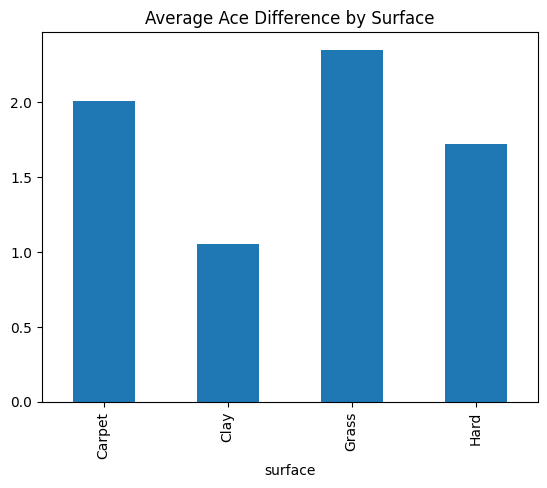

In [10]:
import matplotlib.pyplot as plt

df.groupby('surface')['ace_diff'].mean().plot(kind='bar')
plt.title("Average Ace Difference by Surface")
plt.show()


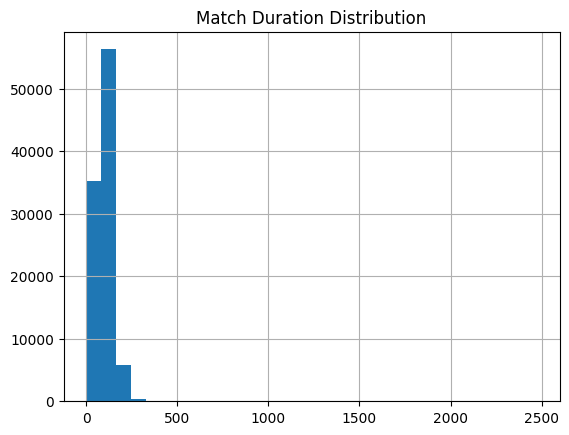

In [11]:
df['minutes'].hist(bins=30)
plt.title("Match Duration Distribution")
plt.show()


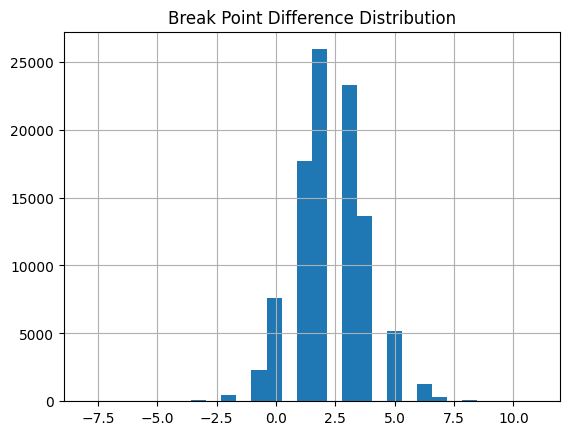

In [12]:
df['bp_diff'].hist(bins=30)
plt.title("Break Point Difference Distribution")
plt.show()


In [13]:
from sklearn.model_selection import train_test_split

X = df[['ace_diff', 'df_diff', 'bp_diff', 'long_match']]
y = df['winner']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [15]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


1.0

In [16]:
num_cols = ['w_ace', 'l_ace', 'w_df', 'l_df', 'w_bpWon', 'l_bpWon', 'minutes']

df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
df = df.dropna()


In [17]:
df['ace_diff'] = df['w_ace'] - df['l_ace']


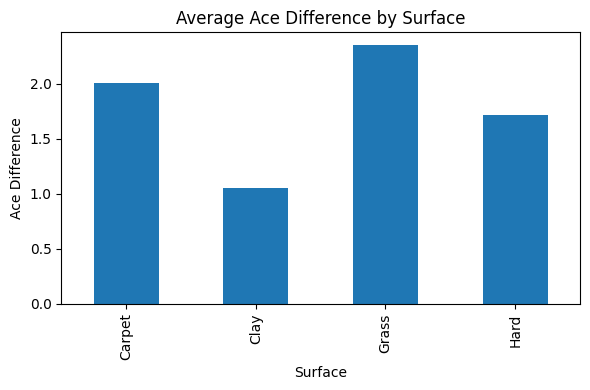

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df.groupby('surface')['ace_diff'].mean().plot(kind='bar')
plt.title("Average Ace Difference by Surface")
plt.ylabel("Ace Difference")
plt.xlabel("Surface")
plt.tight_layout()
plt.show()


In [19]:
df.to_csv("../data/processed_tennis_data.csv", index=False)


KEY OBSERVATION : 

- Ace difference is highest on grass courts, indicating a strong influence of serve dominance on match outcomes.
- Clay courts show the lowest ace difference, suggesting aces play a smaller role on slower surfaces.
- Hard and carpet courts exhibit moderate to high ace differences, reflecting a balanced impact of serving across these surfaces.